# Preliminary Analysis and Baseline

## Data Acquisition and Loading

### Data Sources
The dataset used in this project comes from KenPom's College Basketball Efficiency metrics and NCAA historical tournament results. 
Key features include adjusted offensive efficiency (ADJOE), adjusted defensive efficiency (ADJDE), effective field goal percentage (EFG), turnover rate (TOR), tempo (ADJ_T), and postseason outcomes (POSTSEASON, SEED).


In [18]:
import pandas as pd

# Load CSV (example)
df = pd.read_csv('/home/lambjos3/cmse492_project/data/raw/cbb.csv')

# Show basic info
print(df.shape)
print(df.dtypes)
print(df.head())

(3885, 24)
TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object
             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531   52.6   48.1  15.4   
1       Wisconsin  B10  40  36  129.1   93.6   0.9758   54.8   47.7  12.4   
2        Michigan  B10  40  33  114.4   90.4   0.9375   53.9   47.7  14.0   
3      Texas Tech  B12  38  31  115.2   85.2   0.9696   53.5   43.0  17.7   
4         Gonzaga  WCC  39  37  117.8   86.3   0.9728   56.6  

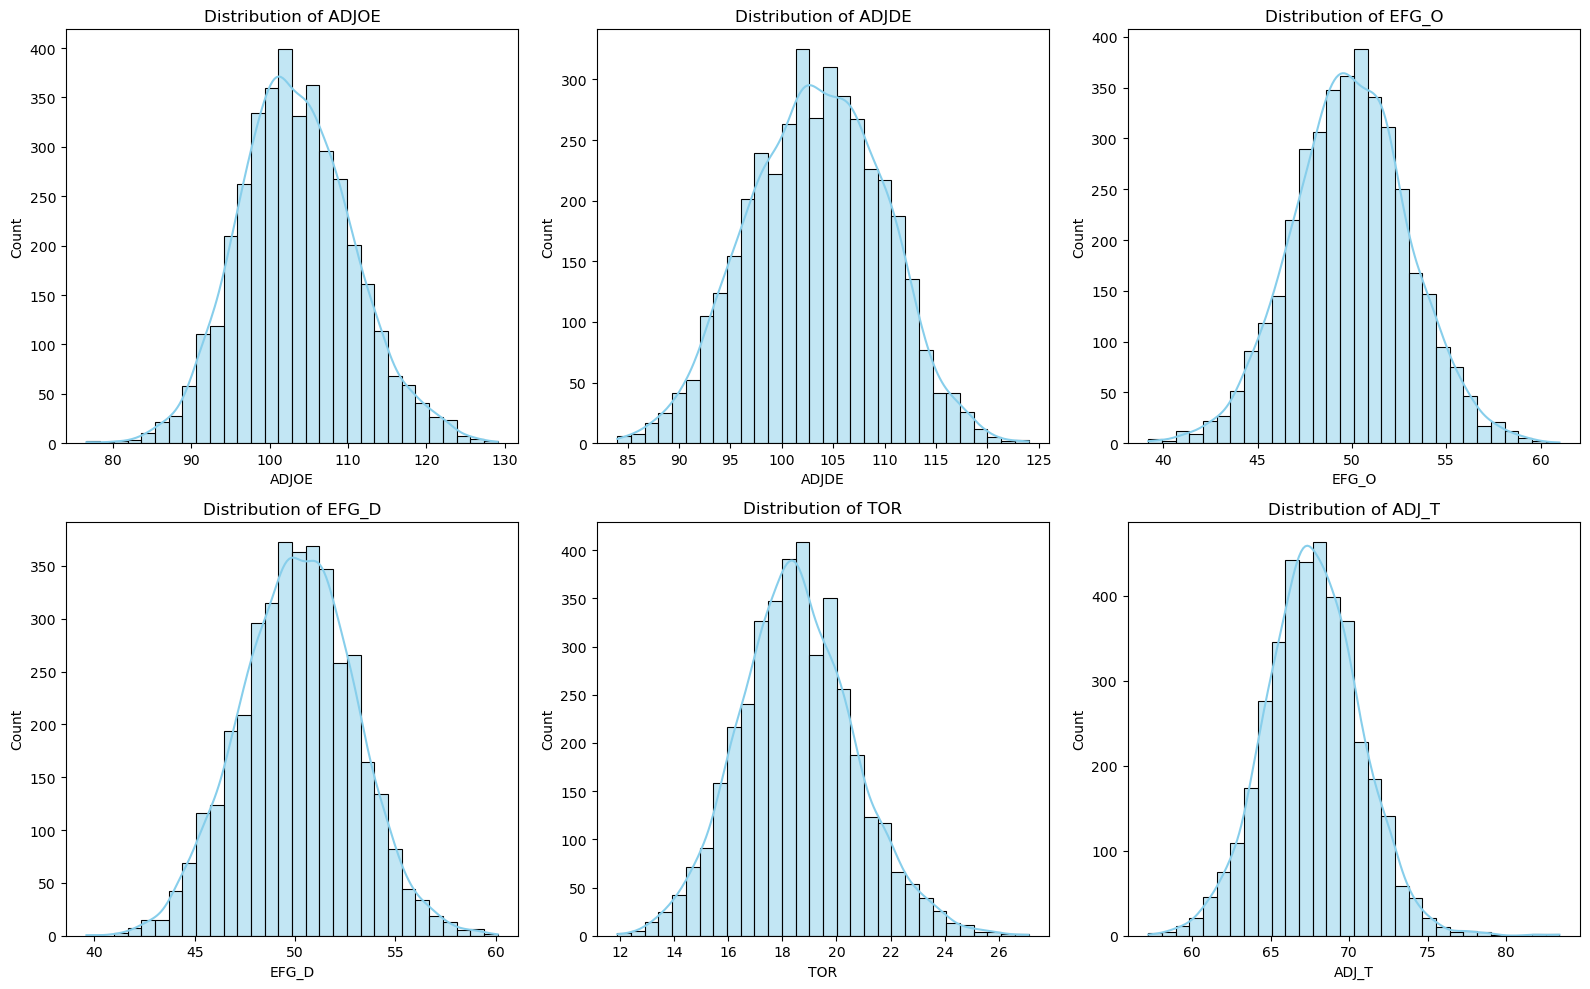

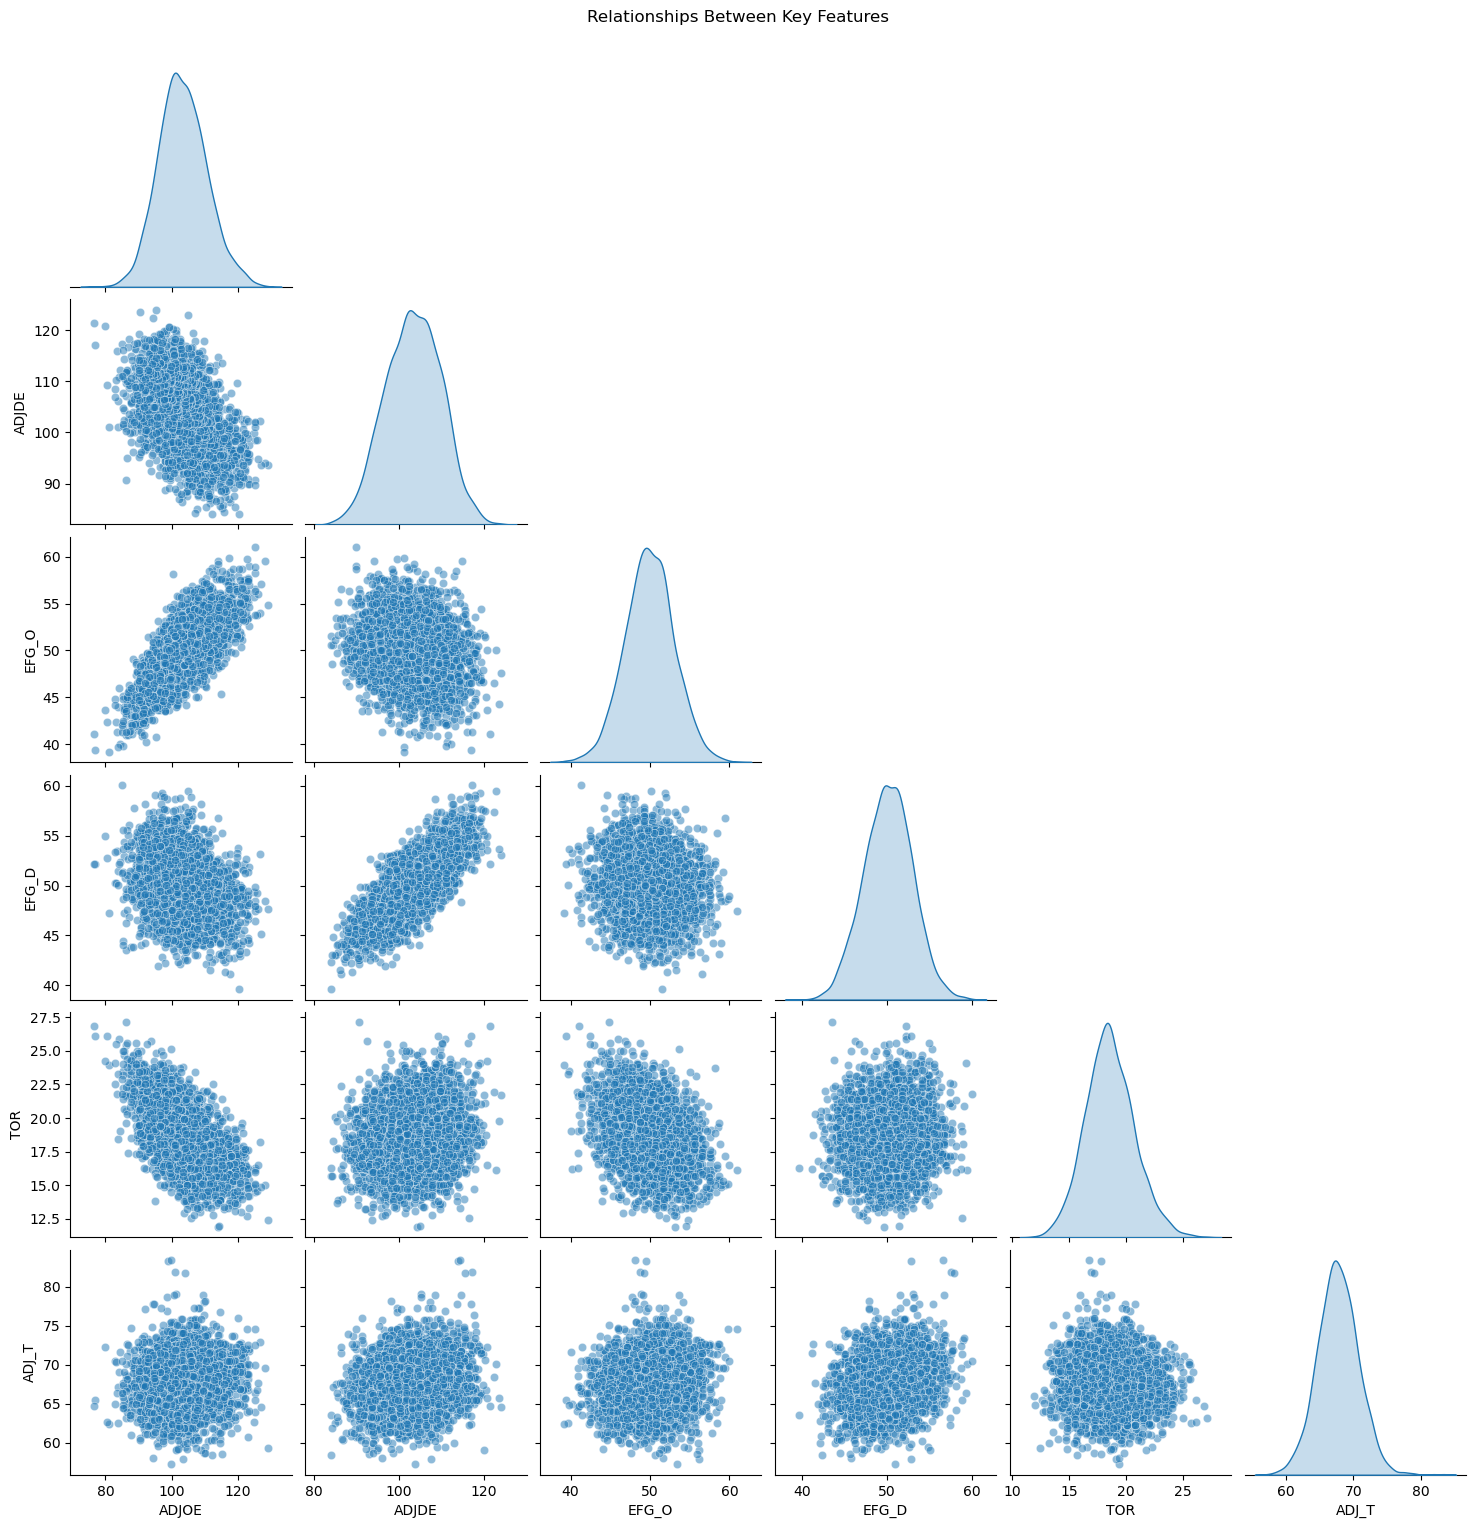

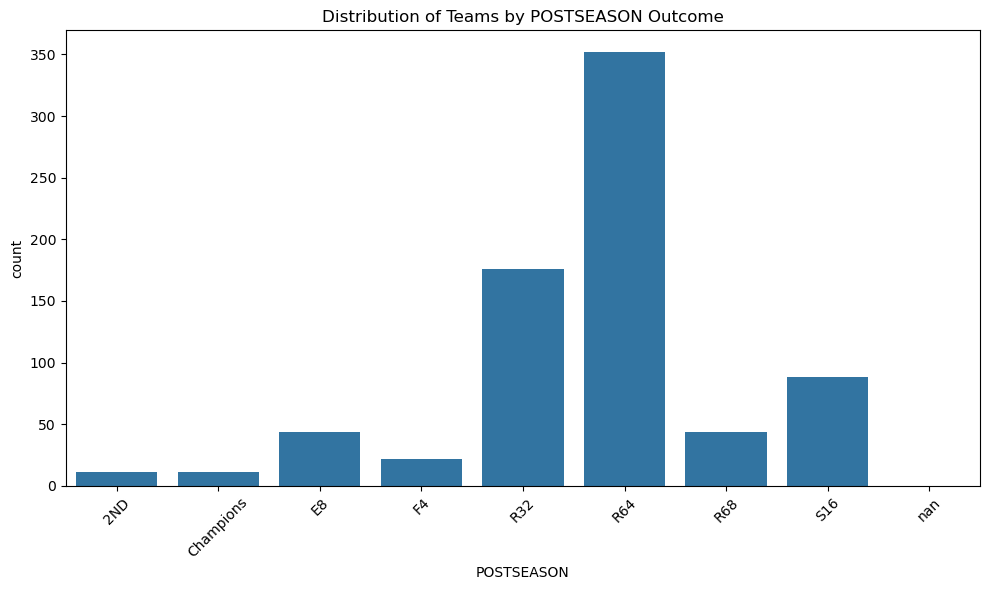

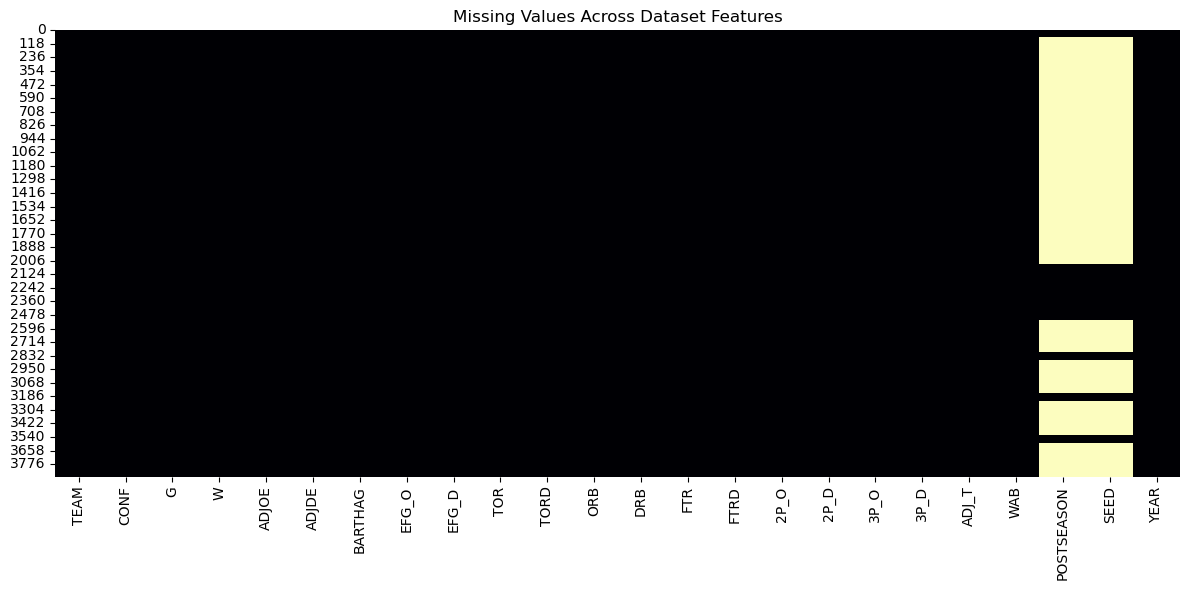

In [19]:
# ==========================================
# Part B2: Initial Exploratory Data Analysis (ChatGPT Assisted)
# ==========================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure figures directory exists
fig_dir = '/home/lambjos3/cmse492_project/figures'
os.makedirs(fig_dir, exist_ok=True)

# ------------------------
# 1. Distribution of Key Features
# ------------------------
key_features = ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'ADJ_T']

plt.figure(figsize=(16,10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'feature_distributions.png'))
plt.show()

# ------------------------
# 2. Relationships Between Variables (Pairplot)
# ------------------------
sns.pairplot(df[key_features], corner=True, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Relationships Between Key Features", y=1.02)
plt.savefig(os.path.join(fig_dir, 'feature_relationships_pairplot.png'))
plt.show()

# ------------------------
# 3. Class Balance / Target Distribution (POSTSEASON)
# ------------------------
plt.figure(figsize=(10,6))
postseason_order = sorted(df['POSTSEASON'].astype(str).unique())
sns.countplot(x='POSTSEASON', data=df, order=postseason_order)  # no palette to avoid warning
plt.title("Distribution of Teams by POSTSEASON Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'postseason_distribution.png'))
plt.show()

# ------------------------
# 4. Missing Values / Data Quality
# ------------------------
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Across Dataset Features")
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'missing_values_heatmap.png'))
plt.show()

=== Baseline Model: Mean Predictor ===
MAE: 5.781
MSE: 52.187
R²: -0.000

=== Simple Linear Regression ===
MAE: 0.878
MSE: 1.258
R²: 0.976


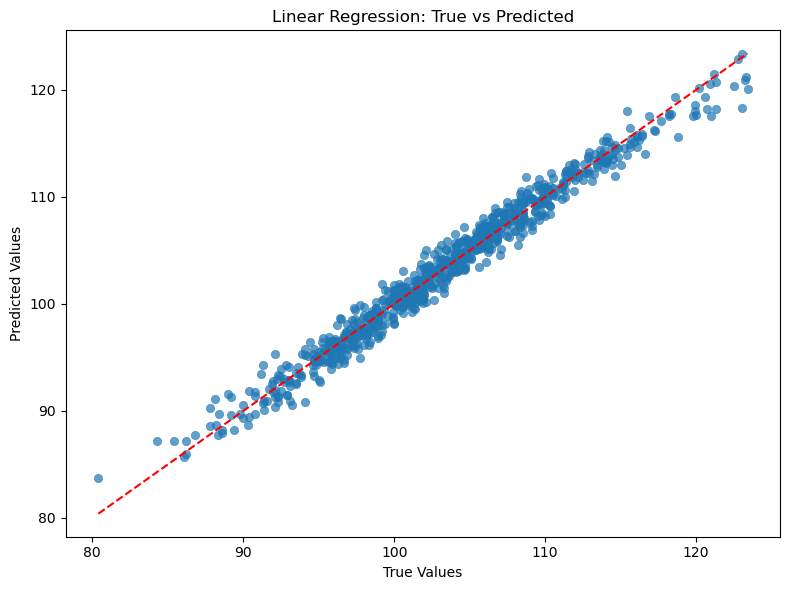

In [20]:
# ==========================================
# Part B3: Baseline Model (Regression)
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ------------------------------------------
# 1. Load processed data
# ------------------------------------------
fig_dir = "/home/lambjos3/cmse492_project/figures"
os.makedirs(fig_dir, exist_ok=True)

# ------------------------------------------
# 2. Define features and target
# ------------------------------------------
target_col = "ADJOE"  # change this if your target is different
df = df.dropna(subset=[target_col])

X = df.select_dtypes(include=[np.number]).drop(columns=[target_col], errors="ignore")
y = df[target_col]

# ------------------------------------------
# 3. Handle missing values using mean imputation (ChatGPT Assisted)
# ------------------------------------------
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# ------------------------------------------
# 4. Baseline Model: Mean Predictor 
# ------------------------------------------
mean_model = DummyRegressor(strategy="mean")
mean_model.fit(X_train, y_train)
y_pred_mean = mean_model.predict(X_test)

# Metrics
mae_mean = mean_absolute_error(y_test, y_pred_mean)
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print("=== Baseline Model: Mean Predictor ===")
print(f"MAE: {mae_mean:.3f}")
print(f"MSE: {mse_mean:.3f}")
print(f"R²: {r2_mean:.3f}")

# ------------------------------------------
# 5. Simple Linear Regression (ChatGPT Assisted)
# ------------------------------------------
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

# Metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n=== Simple Linear Regression ===")
print(f"MAE: {mae_lr:.3f}")
print(f"MSE: {mse_lr:.3f}")
print(f"R²: {r2_lr:.3f}")

# ------------------------------------------
# 6. Plot: True vs Predicted Comparison (ChatGPT Assisted)
# ------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(fig_dir, "baseline_regression_performance.png"))
plt.show()